
## **Notebook Contents**

### <span style="color:#3498db;">Part 1: Exploratory Data Analysis (EDA)</span>
1. **Uploading the dataset**: Loading the initial dataset for analysis.
2. **Visualizing Cells by Location**: Using graphs to explore the x, y, and z coordinates of different cells.
3. **Exploring feature relationships**: Utilizing `sns.pairgrid` to visualize the relationships between columns.
4. **Dropping features 8 and 14**: These features are removed after analysis shows irrelevance or redundancy.
5. **Correlation Matrix**: Creating a correlation matrix to assess relationships between features.
6. **Removing highly correlated features**: Dropping features 9 and 18 due to high multicollinearity.
7. **Adding a day column**: Introducing a "day" column to track data over time.
8. **Combining all datasets**: Merging 15 datasets into a unified dataset.
9. **Plotting Feature Means over Time**: Visualizing the mean of each feature over 15 days to identify trends.
10. **Excluding Feature 1**: Feature 1 is excluded from the model as it remains constant across time.
11. **Clustering based on x, y, z locations**: Clustering location data into 7 clusters and adding a new column `location_cluster`.
12. **Data Preparation**: Preparing data (X, y_11, y_12) for model input.
13. **Random Forest Classifier**: Building a Random Forest model to predict features 11 and 12.
14. **Model Evaluation**: Assessing performance metrics for both features.
15. **Results**: Achieving <span style="color:#2ecc71;">99.6%</span> accuracy for feature 11 and <span style="color:#2ecc71;">99.4%</span> accuracy for feature 12.




In [10]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Uploading first dataset



In [11]:
folder_path = '/home/yahiasalah11/Desktop/Not_Imp/Internship 2024Q3/task1'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]


In [12]:
data_dict = {}

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data_dict[file] = pd.read_csv(file_path)


In [13]:
data_keys = list(data_dict.keys())
data_dict[data_keys[0]]

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,0,1400.0,1.136868e-13,36.0,0.0,6.291904e+07,5.455322e+07,1.093630e+08,1441.167582,0.224335,...,0.203487,True,1400.000000,7.0,6.291809e+07,5.374895e+06,0.021796,0.214286,5.803571e+07,0.264587
1,1,1400.0,1.136868e-13,36.0,2.0,1.865070e+07,1.580629e+07,4.589672e+03,1981.176418,0.248971,...,0.000026,False,1400.000000,9.0,1.865057e+07,2.624299e+03,0.000143,0.142857,8.125000e+07,0.000008
2,2,1400.0,1.136868e-13,36.0,0.0,4.746517e+06,1.930209e+07,3.360348e+06,2045.724566,0.739179,...,0.000000,False,1400.000000,4.0,4.746517e+06,2.079571e+02,0.000043,0.142857,1.142857e+08,0.000146
3,3,1400.0,1.136868e-13,36.0,3.0,7.942825e+07,2.266683e+07,1.429077e+07,405.652561,0.102337,...,0.000200,True,1400.000000,4.0,7.942667e+07,1.786703e+03,0.330803,0.071429,5.803571e+07,0.010898
4,4,1400.0,1.136868e-13,36.0,0.0,7.267096e+06,8.050824e+07,1.222802e+07,2307.346745,0.530619,...,0.000017,False,1400.000000,9.0,7.267096e+06,3.160310e+03,0.000013,0.125000,8.125000e+07,0.000132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,1400.0,2.424871e+03,52.0,0.0,2.136483e+07,3.188155e+07,3.517436e+07,757.080047,0.056558,...,0.000421,False,1809.948452,4.0,2.136482e+07,3.902869e+03,0.000008,0.214286,8.125000e+07,0.000007
167,167,1400.0,2.424871e+03,52.0,0.0,1.628095e+06,1.251337e+07,7.186093e+03,1587.668871,0.385362,...,0.000100,False,1809.948452,11.0,1.628095e+06,3.573406e+02,0.000183,0.250000,1.142857e+08,0.000115
168,168,1400.0,2.424871e+03,52.0,3.0,6.255680e+07,1.608635e+07,1.022153e+08,1675.641612,0.050947,...,0.000000,False,1809.948452,8.0,6.255495e+07,1.012845e+04,0.030200,0.142857,5.803571e+07,0.061584
169,169,1400.0,2.424871e+03,52.0,0.0,3.157001e+07,7.805184e+07,1.430013e+07,1493.734756,0.280244,...,0.000133,False,1809.948452,8.0,3.156997e+07,5.840365e+03,0.000021,0.125000,8.125000e+07,0.000026


#### Visualising cells location 


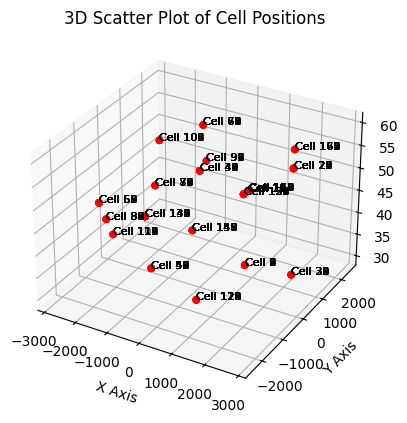

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your x, y, z coordinates stored in lists
x_coords = data_dict[data_keys[0]]['cell_x']
y_coords = data_dict[data_keys[0]]['cell_y']
z_coords = data_dict[data_keys[0]]['cell_z']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x_coords, y_coords, z_coords, c='red', marker='o')
for i in range(len(data_dict[data_keys[0]]['cell_x'])):
    ax.text(data_dict[data_keys[0]]['cell_x'][i], data_dict[data_keys[0]]['cell_y'][i], data_dict[data_keys[0]]['cell_z'][i], f'Cell {i+1}', size=8)

# Label axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Set plot title
ax.set_title('3D Scatter Plot of Cell Positions')

# Show the plot
plt.show()


##### Cells are clusterd 

#### Visualising relations between columns using sns.pairgrid

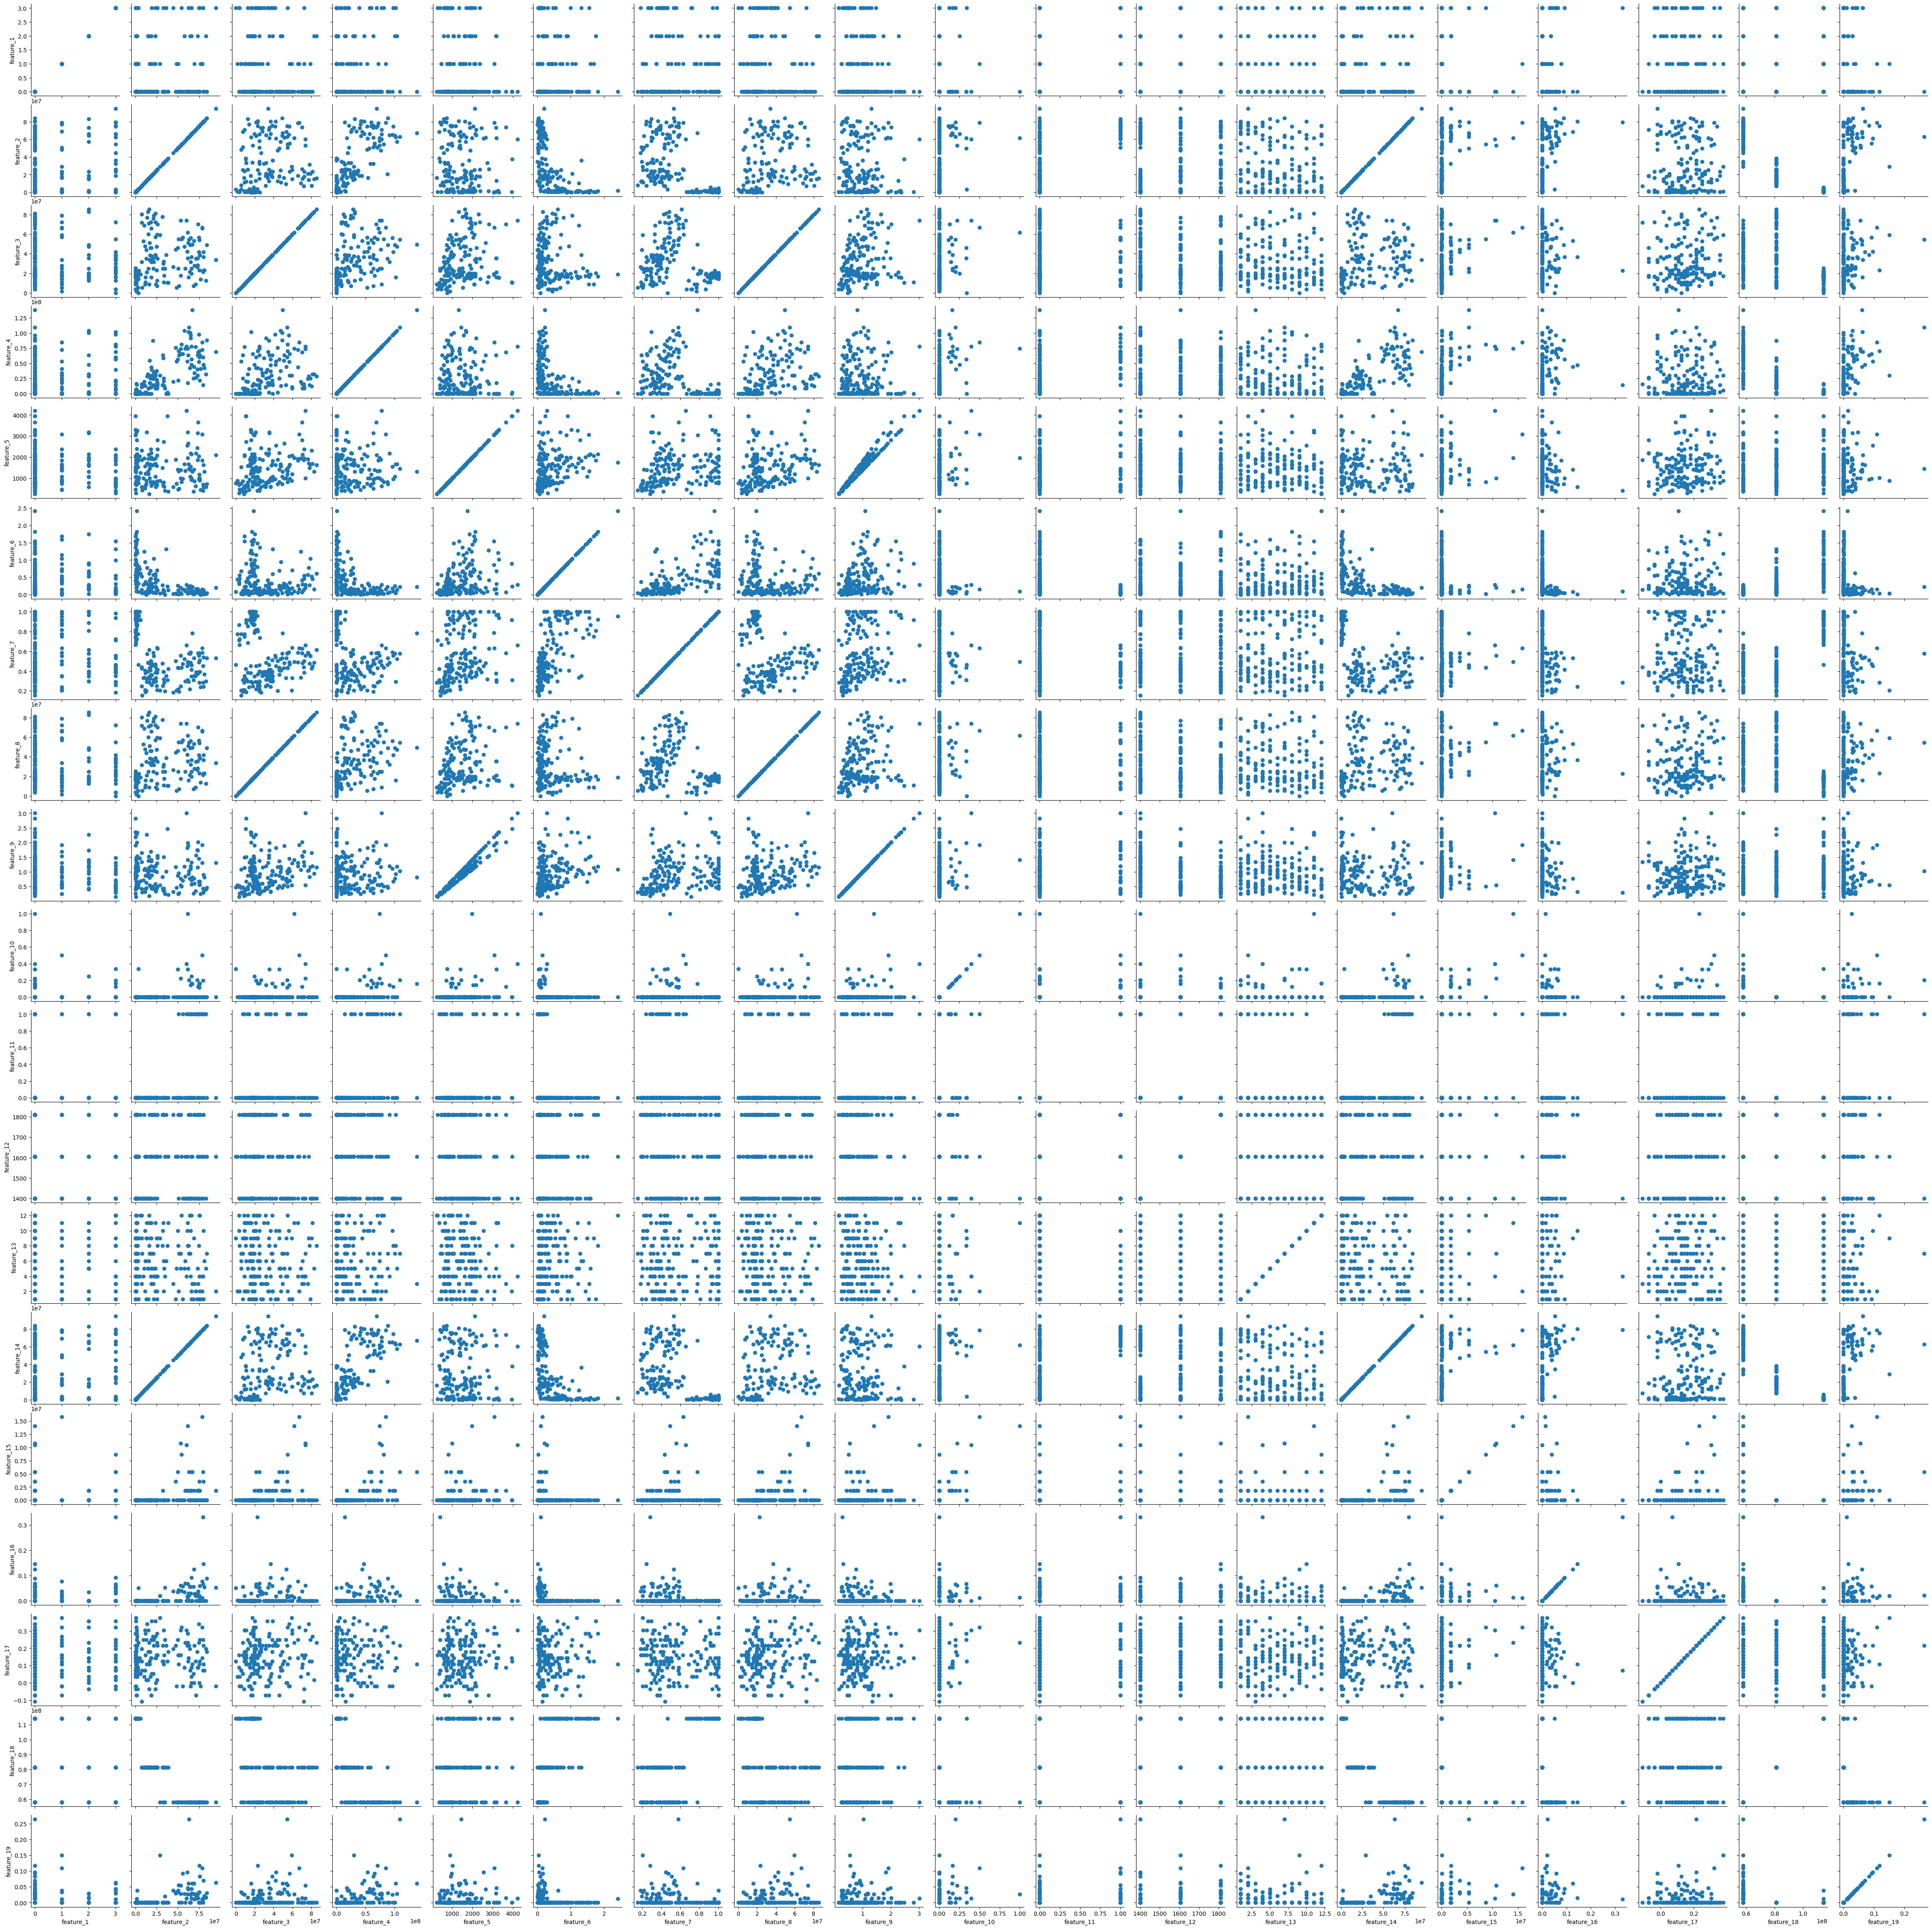

In [16]:

data_without_xyz = data_dict[data_keys[0]].iloc[:, 4:]
x= sns.PairGrid(data_without_xyz)
x= x.map(plt.scatter)

##### Showed that the future 2 and 14 are equal , 3 and 8 are equale.

##### So i will drop 8 and 14


In [ ]:
for key in data_dict.keys():
    # Drop the 8th and the 14th column from each DataFrame
    data_dict[key].drop(data_dict[key].columns[11], axis=1, inplace=True)
    data_dict[key].drop(data_dict[key].columns[16], axis=1, inplace=True)

# Optional: Check the result by printing one of the DataFrames
print(data_dict[key].columns)


Index(['cell_id', 'cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19'],
      dtype='object')


##### From the pair gred we have 5 feutures are catigorical (feuture 1, 11, 12 , 13, 18)
##### and the rest is numircal 

Creating countplots for file: features_day4.csv


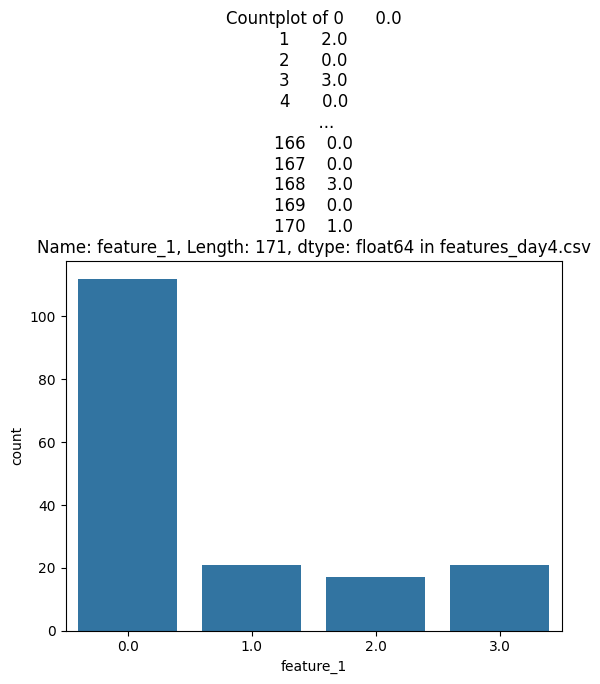

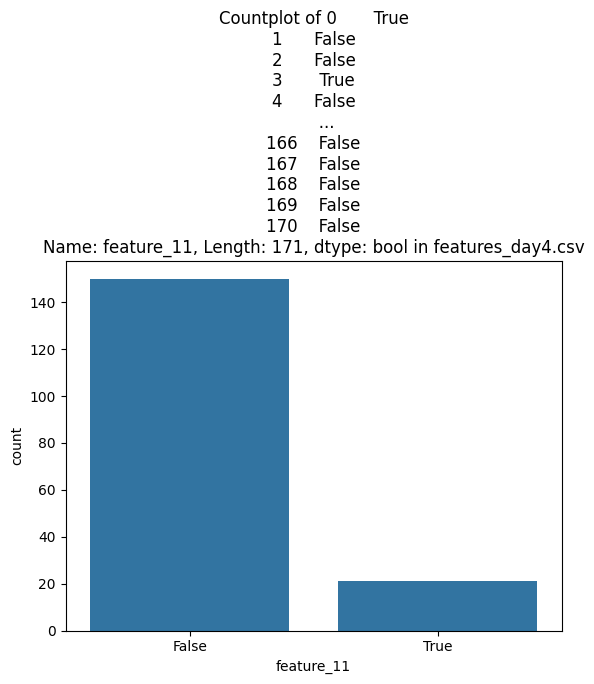

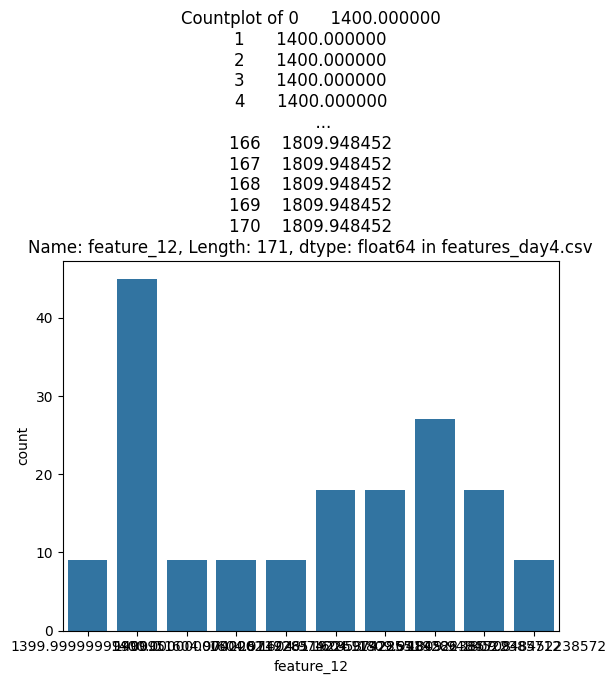

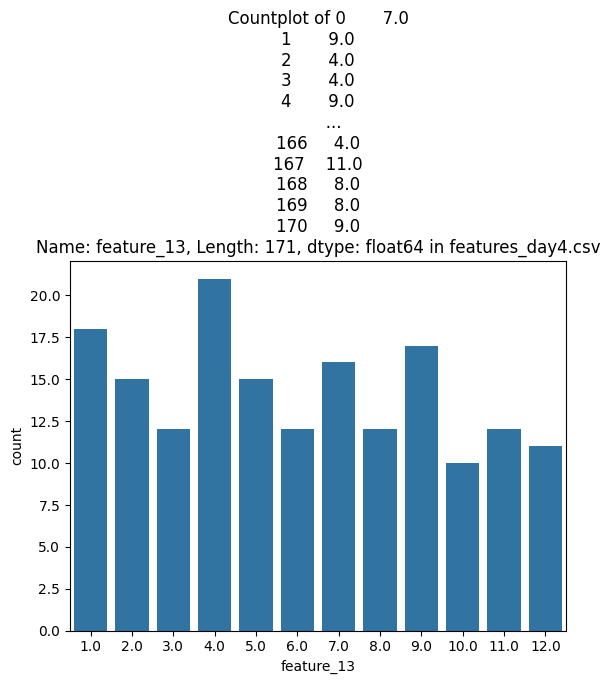

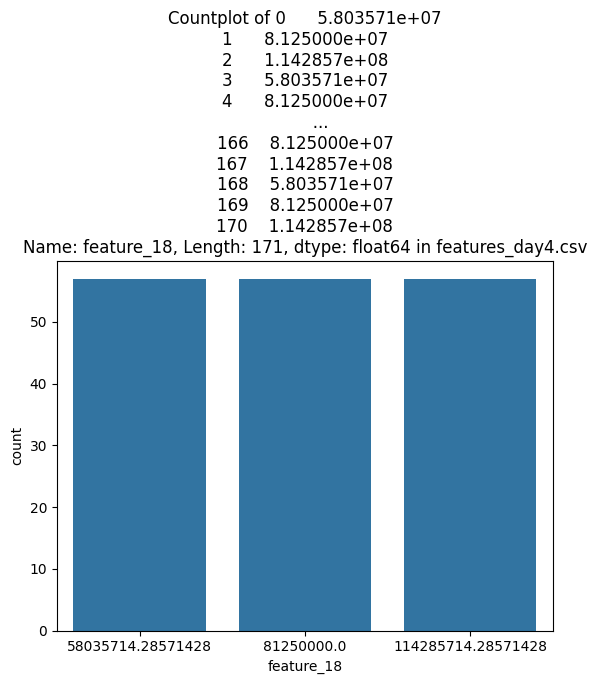

In [ ]:

categorical_indices = ['feature_1', 'feature_11', 'feature_12', 'feature_13', 'feature_18']  # Adjusted for zero-based indexing

# Get the first DataFrame in the dictionary
first_key = list(data_dict.keys())[0]
first_df = data_dict[first_key]

print(f"Creating countplots for file: {first_key}")

# Iterate through the categorical columns by their index
for idx in categorical_indices:
    col = first_df[idx]
    sns.countplot(x=col, data=first_df)
    plt.title(f'Countplot of {col} in {first_key}')
    plt.show()


Creating histograms for file: features_day4.csv


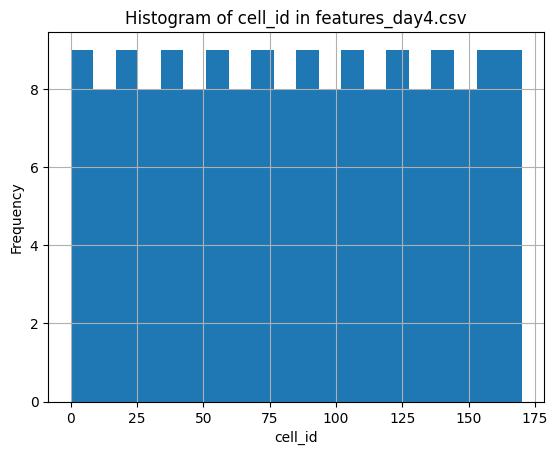

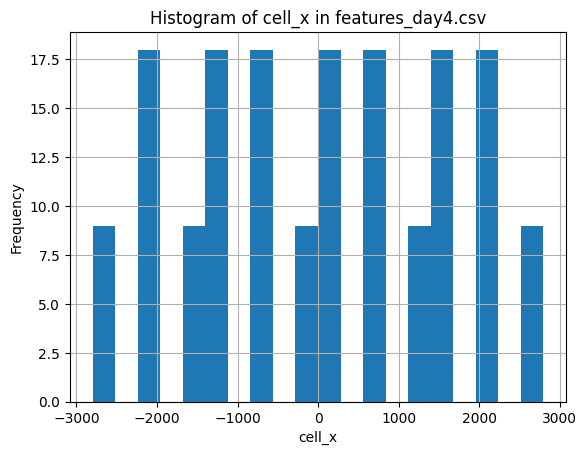

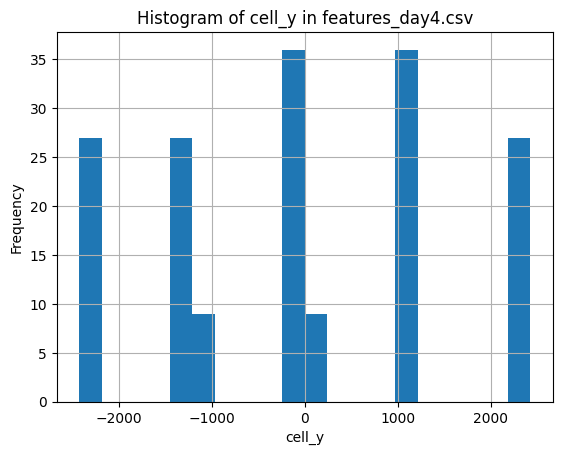

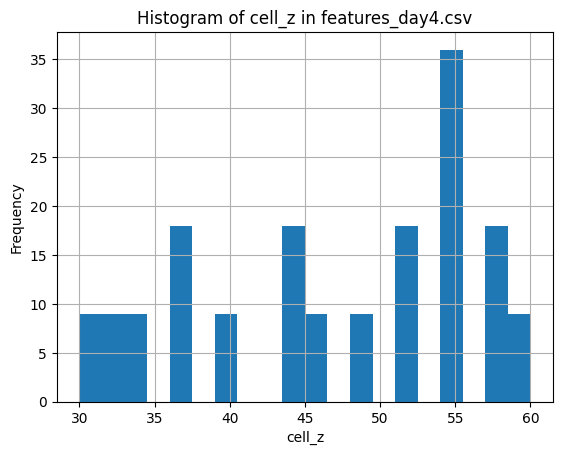

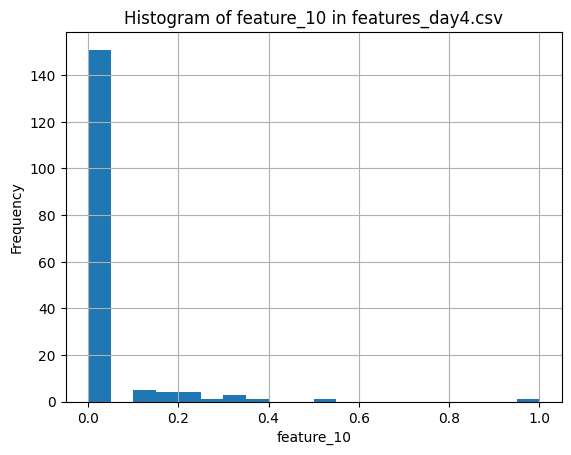

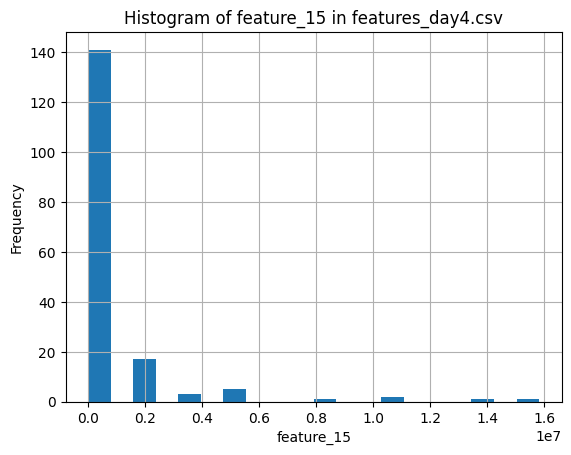

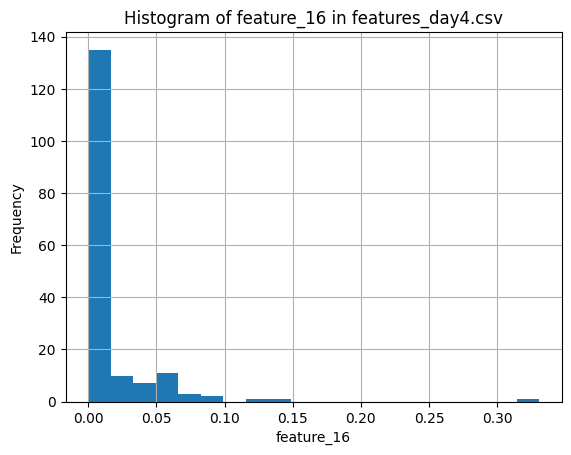

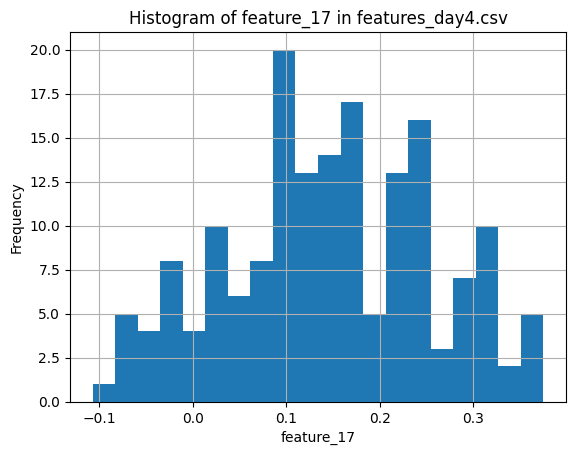

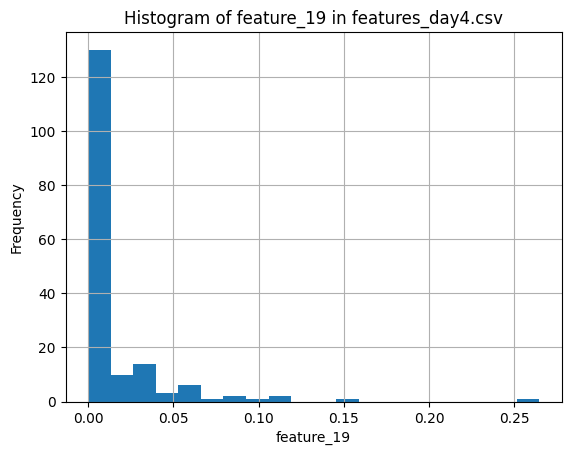

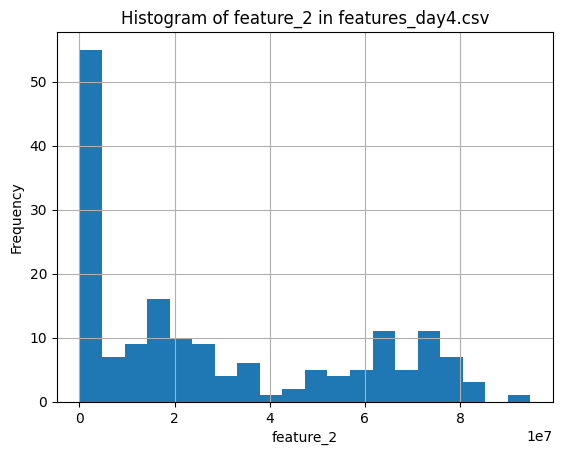

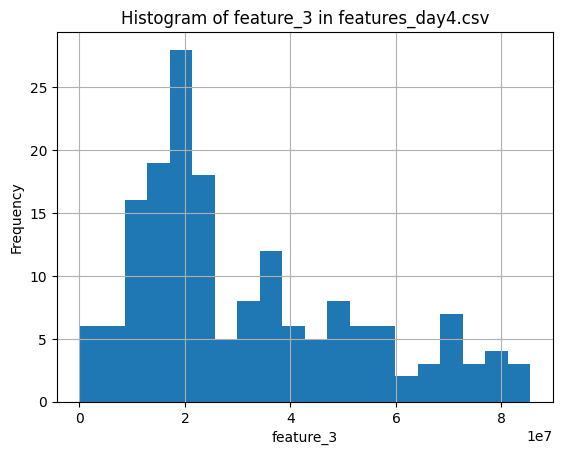

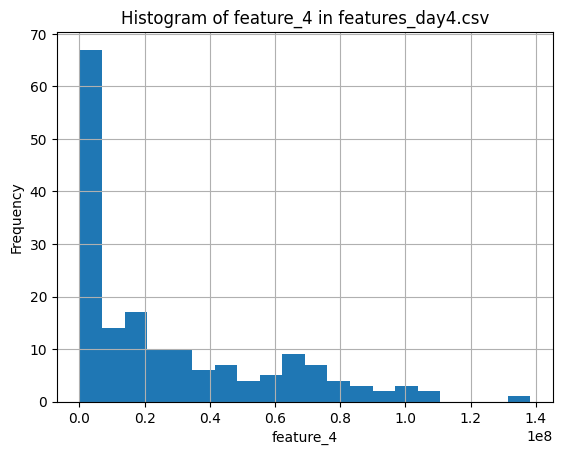

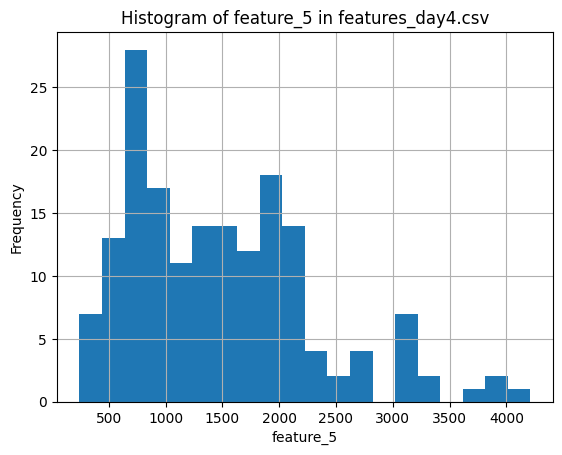

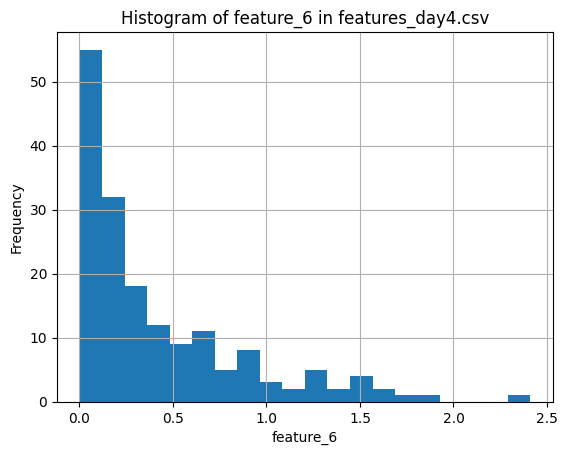

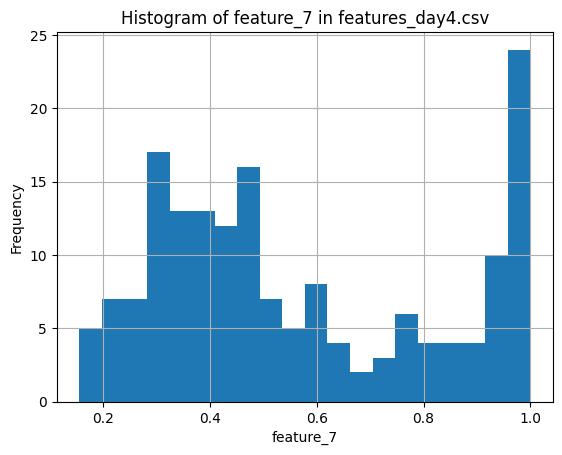

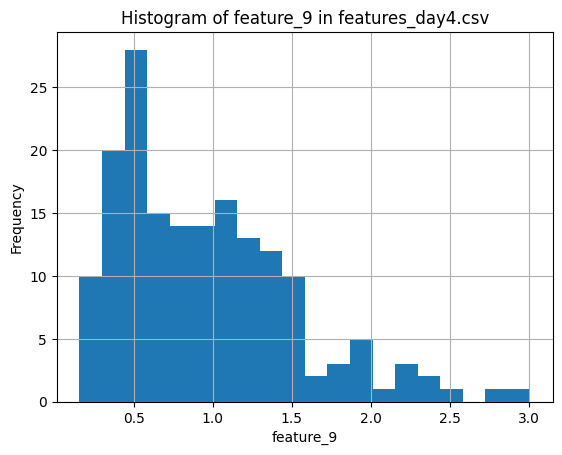

In [ ]:
# Identify numerical columns by excluding the categorical indices
numerical_columns = first_df.columns.difference(first_df[categorical_indices].columns)
print(f"Creating histograms for file: {first_key}")

# Iterate through the numerical columns
for col in numerical_columns:
    first_df[col].hist(bins=20)
    plt.title(f'Histogram of {col} in {first_key}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


#### Making Corelation Matrix for the data 

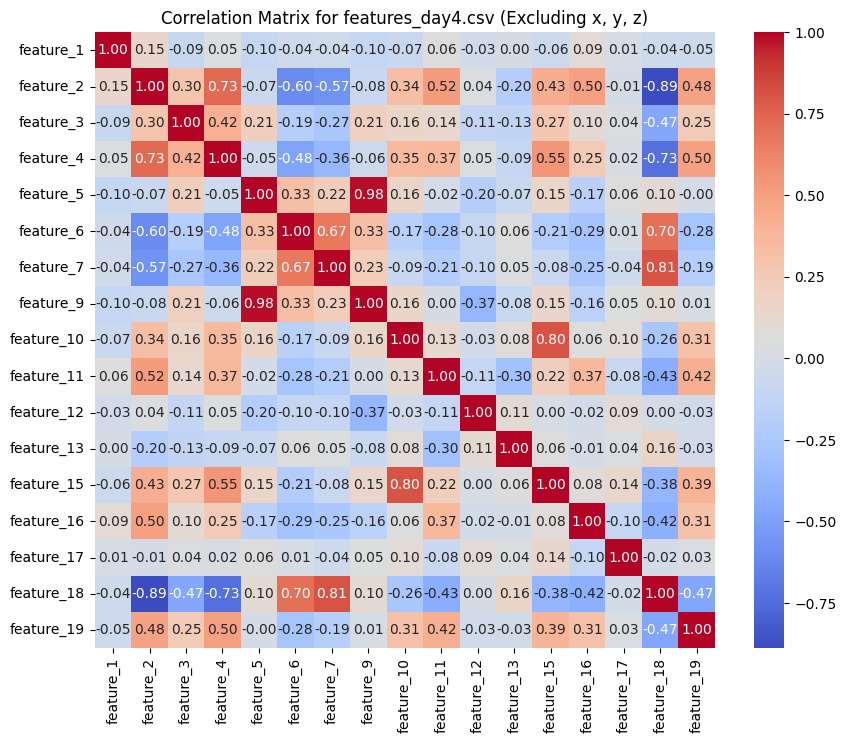

In [ ]:
# Exclude the first three columns (x, y, z)
data_without_xyz = data_dict[data_keys[5]].iloc[:, 4:]      
    
# Compute the correlation matrix
correlation_matrix = data_without_xyz.corr()
    
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Correlation Matrix for {data_keys[0]} (Excluding x, y, z)')
plt.show()


#### feature 5 and 9 have high positive correlation = .98

#### feature 2 and 18 have high nigative correlation = -0.89 

### So for avoiding redandincy i will delete feature 9 and 18



In [ ]:
for key in data_dict.keys():
    # Drop the 8th and the 14th column from each DataFrame
    data_dict[key].drop(data_dict[key].columns[11], axis=1, inplace=True)
    data_dict[key].drop(data_dict[key].columns[18], axis=1, inplace=True)

# Optional: Check the result by printing one of the DataFrames
print(data_dict[key].head())


   cell_id  cell_x        cell_y  cell_z  feature_1     feature_2  \
0        0  1400.0  1.136868e-13    36.0        0.0  4.212095e+07   
1        1  1400.0  1.136868e-13    36.0        2.0  1.612131e+07   
2        2  1400.0  1.136868e-13    36.0        0.0  4.746517e+06   
3        3  1400.0  1.136868e-13    36.0        3.0  7.546663e+07   
4        4  1400.0  1.136868e-13    36.0        0.0  1.284810e+07   

      feature_3     feature_4    feature_5  feature_6  feature_7  feature_10  \
0  7.599065e+07  1.281761e+08  1585.700161   0.079634   0.604290    0.253454   
1  1.402012e+07  4.589672e+03  1981.176418   0.285416   0.429845    0.000026   
2  1.930209e+07  3.360348e+06  2045.724566   0.731598   1.000000    0.000000   
3  2.266648e+07  1.429077e+07   382.953000   0.012744   0.318388    0.000068   
4  7.542843e+07  5.362047e+06  2867.125564   0.898232   0.403379    0.000021   

   feature_11  feature_12  feature_13    feature_15  feature_16  feature_17  \
0        True      1400.0

#### Adding day column to the data

#### Then Compin all the data files in one file 

In [ ]:
import pandas as pd

# Initialize an empty list to store data with the 'Day' column added
combined_data = []

# Loop through the 15 files in data_dict
for i, key in enumerate(data_dict.keys()):
    df = data_dict[key].copy()
    df['Day'] = i + 1  # Add a 'Day' column indicating the day number
    combined_data.append(df)

# Combine all the DataFrames into one
combined_df = pd.concat(combined_data, ignore_index=True)

# Display the first few rows of the combined data
print(combined_df.head())


   cell_id  cell_x        cell_y  cell_z  feature_1     feature_2  \
0        0  1400.0  1.136868e-13    36.0        0.0  6.291904e+07   
1        1  1400.0  1.136868e-13    36.0        2.0  1.865070e+07   
2        2  1400.0  1.136868e-13    36.0        0.0  4.746517e+06   
3        3  1400.0  1.136868e-13    36.0        3.0  7.942825e+07   
4        4  1400.0  1.136868e-13    36.0        0.0  7.267096e+06   

      feature_3     feature_4    feature_5  feature_6  feature_7  feature_10  \
0  5.455322e+07  1.093630e+08  1441.167582   0.224335   0.578041    0.203487   
1  1.580629e+07  4.589672e+03  1981.176418   0.248971   0.453333    0.000026   
2  1.930209e+07  3.360348e+06  2045.724566   0.739179   1.000000    0.000000   
3  2.266683e+07  1.429077e+07   405.652561   0.102337   0.284482    0.000200   
4  8.050824e+07  1.222802e+07  2307.346745   0.530619   0.429234    0.000017   

   feature_11  feature_12  feature_13    feature_15  feature_16  feature_17  \
0        True      1400.0

#### Plotting each Feature mean accross the 15 days 

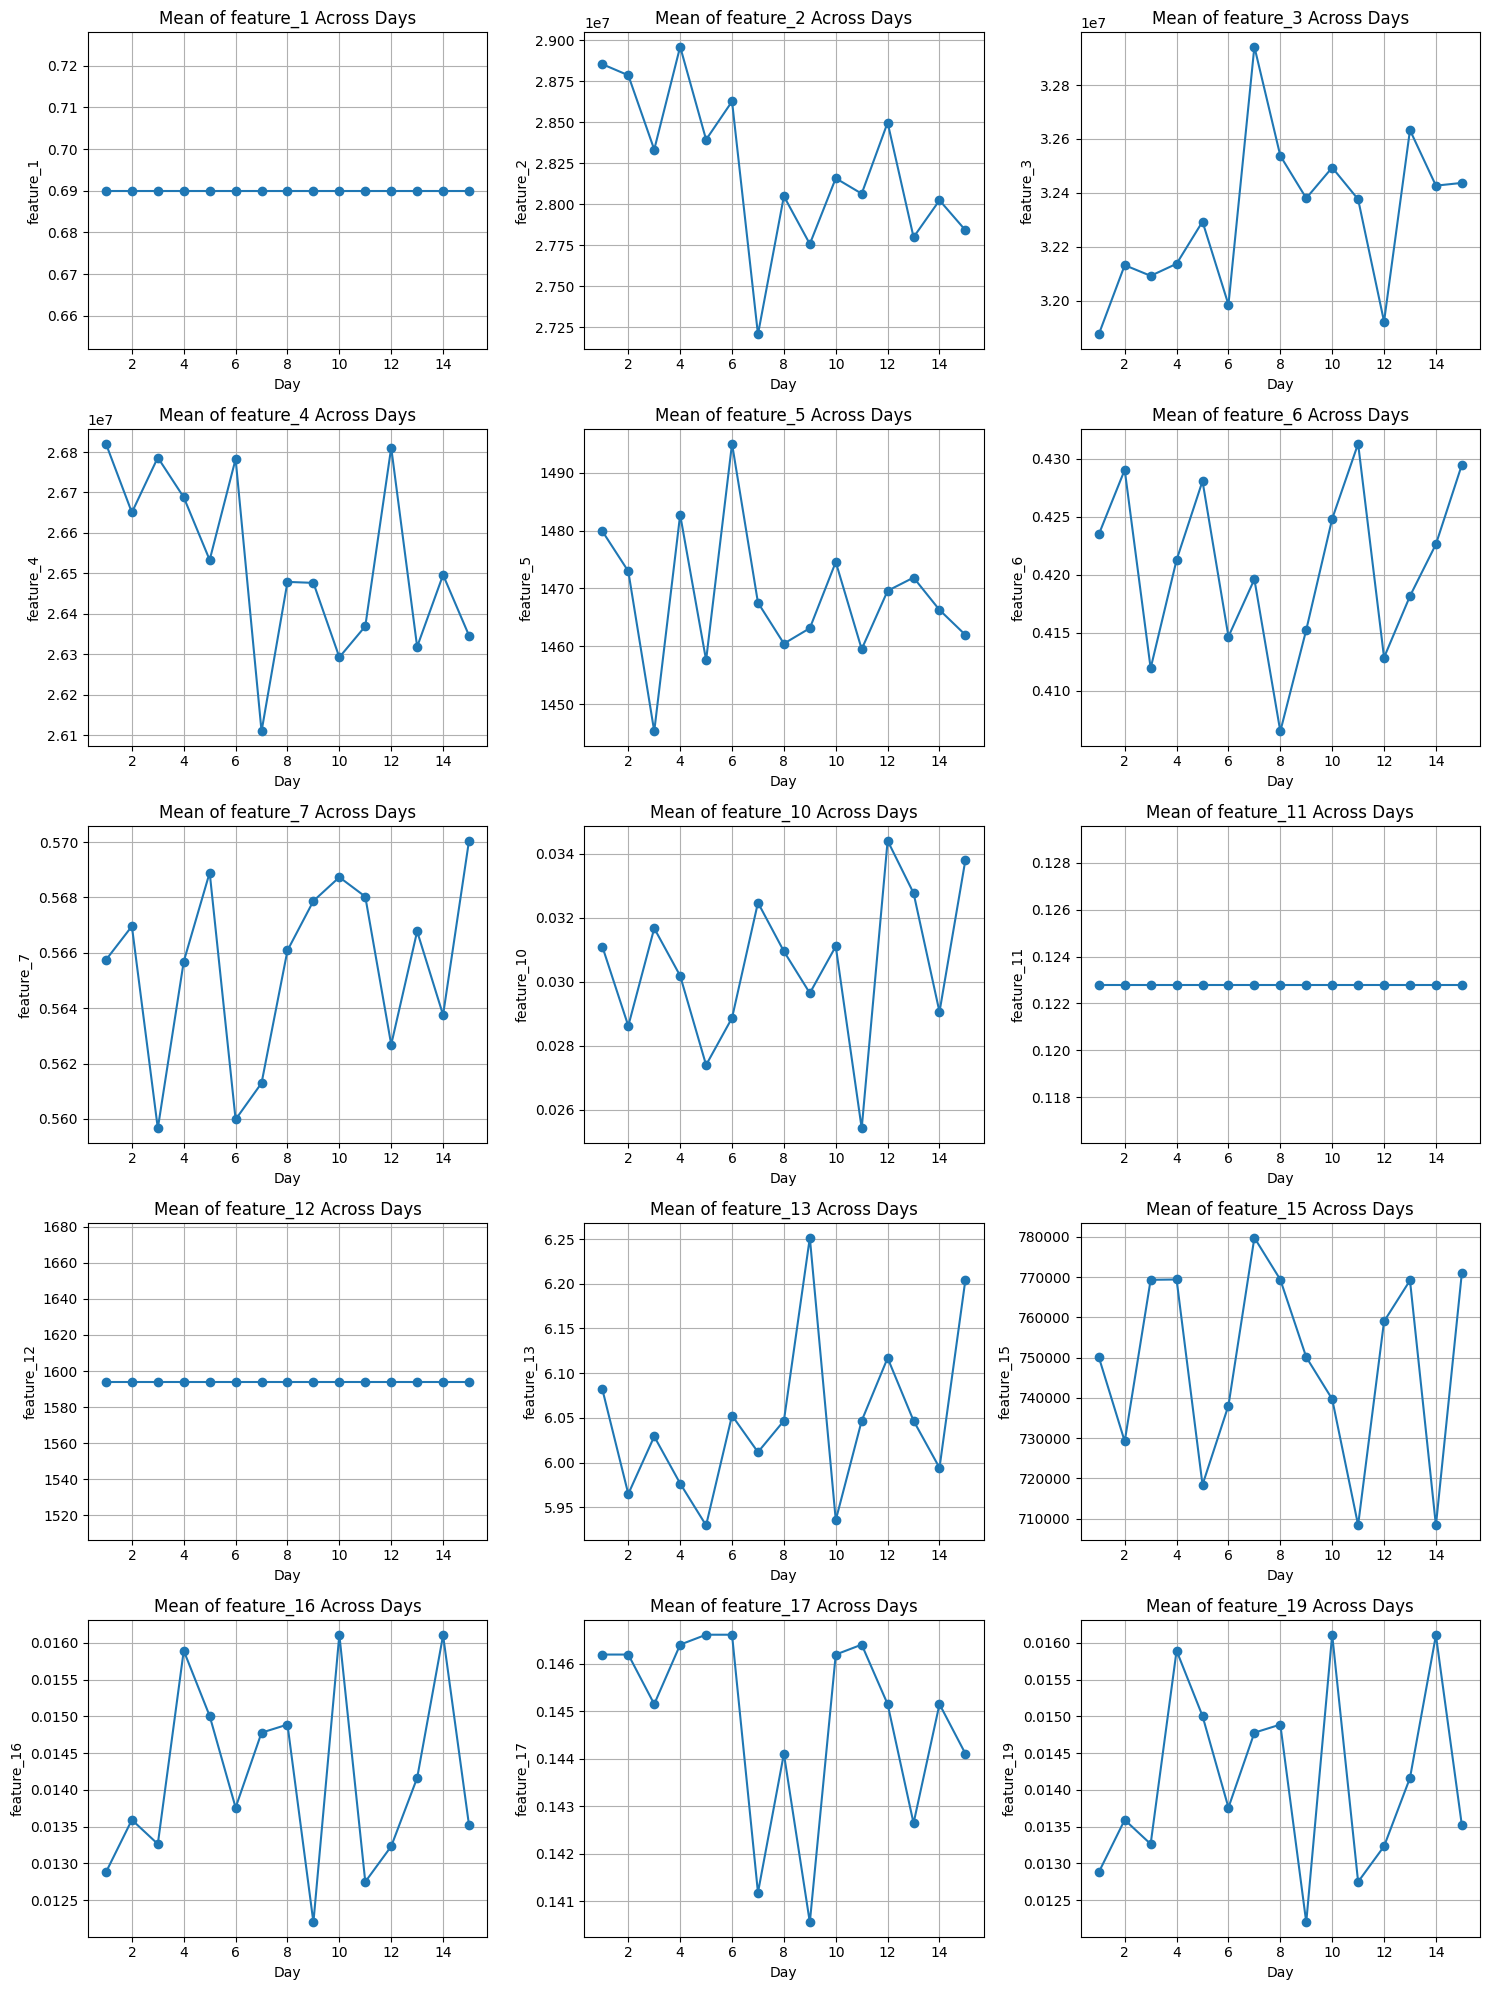

In [ ]:
import matplotlib.pyplot as plt

# Exclude the first three columns ('x', 'y', 'z') and calculate the mean for the remaining columns
mean_per_day = combined_df.iloc[:, 4:].groupby('Day').mean()

# Set up the number of rows and columns for the subplots grid
n_cols = 3  # Number of columns in the grid
n_rows = (mean_per_day.shape[1] + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots for all variables
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(mean_per_day.columns):
    axes[i].plot(mean_per_day.index, mean_per_day[col], marker='o')
    axes[i].set_title(f'Mean of {col} Across Days')
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.show()



#### Mean of features 1,11 and 12 don't change accrose Days, So i will not use feature 1 in the modol for predicting 11 and 12


## Creating the model


#### I will use the X,Y and Z cordineats by Clustring them into 8 clusters (showed from the Graph)

In [ ]:
from sklearn.cluster import KMeans

location_data = combined_df[['cell_x', 'cell_y', 'cell_z']]
# Cluster the x, y, z locations
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(location_data)

# Add cluster labels to your feature set
combined_df['location_cluster'] = clusters

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(combined_df.iloc[:, 13])

array([1, 1, 1, ..., 7, 7, 7])

#### Preparing the X and y_11 and y_12 data for the model  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans

# Exclude location columns (x, y, z) and target columns (11 and 12)
X = combined_df.iloc[:, 5:12].join(combined_df.iloc[:, 14:21])

# Feature 11 (binary: True/False) as target
y_11 = combined_df.iloc[:, 12]

# Feature 12 (categorical with 10 repeated numbers) as target
y_12 = combined_df.iloc[:, 13]

# Label encoding for Feature 12
label_encoder = LabelEncoder()
y_12_encoded = label_encoder.fit_transform(y_12)

# Split the data into train and test sets for both target variables
X_train, X_test, y_11_train, y_11_test, y_12_train, y_12_test = train_test_split(X, y_11, y_12_encoded, test_size=0.2, random_state=42)


#### Random Forest Classifier for predicting feature 11 and 12:


In [ ]:
# Train Random Forest model for Feature 11 (True/False)
rf_11 = RandomForestClassifier(random_state=42)
rf_11.fit(X_train, y_11_train)

# Train Random Forest model for Feature 12 (Categorical)
rf_12 = RandomForestClassifier(random_state=42)
rf_12.fit(X_train, y_12_train)

RandomForestClassifier(random_state=42)

#### Evaluate the model for both features:


In [ ]:
# Predict for feature 11
y_11_pred = rf_11.predict(X_test)

# Predict for feature 12
y_12_pred = rf_12.predict(X_test)

# Evaluate for feature 11
print("Evaluation for Feature 11 (True/False):")
print(classification_report(y_11_test, y_11_pred))
print(f"Accuracy: {accuracy_score(y_11_test, y_11_pred)}")

# Convert the classes (unique values in Feature 12) to strings
target_names = [str(int(val)) for val in label_encoder.classes_]

# Print the classification report with corrected target names
print("\nEvaluation for Feature 12 (Categorical):")
print(classification_report(y_12_test, y_12_pred, target_names=target_names))
print(f"Accuracy: {accuracy_score(y_12_test, y_12_pred)}")


Evaluation for Feature 11 (True/False):
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       452
        True       1.00      0.97      0.98        61

    accuracy                           1.00       513
   macro avg       1.00      0.98      0.99       513
weighted avg       1.00      1.00      1.00       513

Accuracy: 0.9961013645224172

Evaluation for Feature 12 (Categorical):
              precision    recall  f1-score   support

        1399       1.00      1.00      1.00        22
        1400       0.99      1.00      0.99       145
        1400       1.00      1.00      1.00        27
        1604       1.00      1.00      1.00        27
        1604       1.00      0.86      0.92        21
        1604       1.00      1.00      1.00        62
        1604       1.00      1.00      1.00        44
        1809       0.99      1.00      0.99        86
        1809       1.00      1.00      1.00        54
        1809       1.

#### Reching 99.6% on predicting Feuture 11 and 99.4% on predicting Feuture 12